In [1]:
from google.colab import drive

drive.mount('/content/drive')           # Mounting Google Drive as the dataset is quite large

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Problem Statement

An education company named X Education sells online courses to industry professionals. Although X Education gets a lot of leads, its lead conversion rate is very poor.
Objective
To make this process more efficient, the company wishes to identify the most potential leads

# Importing Necessary Libraries

In [2]:
# Data Analysis Library
import numpy as np
import pandas as pd

# Data Visualization Library
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Importing sklearn and statsmodels libraries

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as smf
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, accuracy_score, precision_score, recall_score, precision_recall_curve, f1_score

# Fixing the Warnings
import warnings
warnings.filterwarnings(action = "ignore")

# Displaying all columns in the DataFrame
pd.options.display.max_columns = None

# Loading Data

In [3]:
leads = pd.read_csv('/content/drive/MyDrive/Leads.csv')

# Data Understanding

In [4]:
leads.head(2)       # To display first few rows

Prospect ID  Lead Number Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737         API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728         API   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   

  Country Specialization How did you hear about X Education  \
0     NaN         Select                             Select   
1   India         Select                             Select   

  What is your current occupation  \
0                      Unemployed   
1                      Unemployed   

  What matters most to you in choosing a course Search Magazine  \
0                       Better Career Prospects     No       No   
1                       Better Career Prospects     No       No   

  Newspaper Article X Education Forums Newspaper Digital Advertisement  \
0                No                 No        No                    No   
1                No                 No        No                    No   

  Through Recommendations Receive More Updates About Our Courses  \
0                      No                                     No   
1                      No                                     No   

                          Tags      Lead Quality  \
0  Interested in other courses  Low in Relevance   
1                      Ringing               NaN   

  Update me on Supply Chain Content Get updates on DM Content Lead Profile  \
0                                No                        No       Select   
1                                No                        No       Select   

     City Asymmetrique Activity Index Asymmetrique Profile Index  \
0  Select                   02.Medium                  02.Medium   
1  Select                   02.Medium                  02.Medium   

   Asymmetrique Activity Score  Asymmetrique Profile Score  \
0                         15.0                        15.0   
1                         15.0                        15.0   

  I agree to pay the amount through cheque  \
0                                       No   
1                                       No   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened

In [5]:
leads.shape         # To display the rows and columns present in the data

(9240, 37)

**Observation:**
- The DataFrame has 9240 rows and 37 columns.

In [6]:
leads.columns       # To display the column names present in data

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [7]:
leads.nunique()              # To display number of unique values

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     19
How did you hear about X Education                 10
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

In [8]:
# To display column-wise information of data (data types, null/non-null values, memory, etc.)

leads.info('all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

**Observation:**
- There are null / missing values in data.
- We will look for it and handle them during Data Cleaning.

In [9]:
# To find out Statistical Summary of data
# Using .T (transpose) as we have many columns so for easier understanding

leads.describe().T

count           mean           std       min  \
Lead Number                  9240.0  617188.435606  23405.995698  579533.0   
Converted                    9240.0       0.385390      0.486714       0.0   
TotalVisits                  9103.0       3.445238      4.854853       0.0   
Total Time Spent on Website  9240.0     487.698268    548.021466       0.0   
Page Views Per Visit         9103.0       2.362820      2.161418       0.0   
Asymmetrique Activity Score  5022.0      14.306252      1.386694       7.0   
Asymmetrique Profile Score   5022.0      16.344883      1.811395      11.0   

                                  25%       50%        75%       max  
Lead Number                  596484.5  615479.0  637387.25  660737.0  
Converted                         0.0       0.0       1.00       1.0  
TotalVisits                       1.0       3.0       5.00     251.0  
Total Time Spent on Website      12.0     248.0     936.00    2272.0  
Page Views Per Visit              1.0       2.0       3.00      55.0  
Asymmetrique Activity Score      14.0      14.0      15.00      18.0  
Asymmetrique Profile Score       15.0      16.0      18.00      20.0

# Data Cleaning & Data Manipulation

* As per problem statement, there are many categorical variables which have levels called 'Select' which needs to be handled (**as good as null value**)

## Why?

**ASSUMPTION:**

**Reason:** Maybe the customer must have not selected any option from dropdown list and hence for such columns data the remained as the default option, i.e., "Select".

### **CHECK 1:** Handling "Select" values

**APPROACH:** Using list comprehension, to print column names where column in data contains the levels / categories as "Select".

In [10]:
# Using list comprehension, to check whether "Select" is present in data

cols_with_Select= [col for col in leads.columns if len(leads[col].isin(['Select']).unique())>1]
cols_with_Select

['Specialization',
 'How did you hear about X Education',
 'Lead Profile',
 'City']

**Observation:**
- There are 4 columns which have "Select" values :-
1. 'Specialization'
2. 'How did you hear about X Education'
3. 'Lead Profile'
4. 'City'

In [11]:
# Replace Select with null / missing / NaN values

leads.replace("Select", np.nan, inplace=True)

In [12]:
# Using list comprehension, to check whether "Select" is present in data

print([i for i in leads.columns if "Select" in leads[i].values])

[]


**Observation:**
- There are no "Select" values present in data.

**Select Values Treatment Completed !!!**

**ASSUMPTION HANDLED**

### **CHECK 2:** Null / NaN / Missing Values Check

In [13]:
# To check for percentage of missing / null values per column

100 * leads.isnull().mean().sort_values(ascending = False)

How did you hear about X Education               78.463203
Lead Profile                                     74.188312
Lead Quality                                     51.590909
Asymmetrique Profile Score                       45.649351
Asymmetrique Activity Score                      45.649351
Asymmetrique Activity Index                      45.649351
Asymmetrique Profile Index                       45.649351
City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.3896

**APPROACH 1:** Handling Missing values by Dropping

In [14]:
# Creating a User Defined Function to drop columns and to know shape before and after dropping

def Drop_null(data, percentage= 40):

    null_val = 100 * (data.isnull().mean()).sort_values(ascending=False)
    drop_column = null_val[null_val >= percentage].index.to_list()
    print("Columns Dropped (in total) =  ", len(drop_column),"\n")
    print("List of the dropped columns = " , drop_column,"\n")
    print("Shape => Before dropping columns = ", data.shape)

    data.drop(labels= drop_column, axis= 1, inplace= True)

    print("Shape => After dropping columns = ", data.shape)

In [15]:
# Dropping null / missing values using User Defined Functions

Drop_null(leads)

Columns Dropped (in total) =   7 

List of the dropped columns =  ['How did you hear about X Education', 'Lead Profile', 'Lead Quality', 'Asymmetrique Profile Score', 'Asymmetrique Activity Score', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index'] 

Shape => Before dropping columns =  (9240, 37)
Shape => After dropping columns =  (9240, 30)


In [16]:
# Let's check for missing values again

100 * leads.isnull().mean().sort_values(ascending = False)

City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
Through Recommendations                           0.000000
Receive More Updates About Our Courses            0.000000
Prospect ID                                       0.000000
Newspaper                                         0.000000
Update me on Supply Chain Content                 0.000000
Get updates on DM Content                         0.000000
I agree to pay the amount through cheque          0.0000

**Observation:**
- **City**: has ~40% missing values (approx). Imputing missing values with Mumbai will make the data more skewed. Skewness causes bias during modelling.
- **Tags**: has 36% missing values. Tags are assigned to customers, indicating current status of the lead. As this is current status, this column will not be useful for modelling.
- **What matters most to you in choosing a course:** has 29% missing values. 99.95% customers have selected 'better career prospects'. As it is highly skewed it will not be helpful for further analysis.
- **Country:** XEducation sells online courses and approx. 96% of customers are from India. As per business understanding, it is irrelevant to impute missing values with India. Hence, dropping "Country".

**DROPPING** the following -
- "City"
- "Tags"
- "What matters most to you in choosing a course"
- "Country"

In [17]:
# Dropping Columns

print("Shape => Before Drop = ", leads.shape)

leads.drop(['City','Tags','Country','What matters most to you in choosing a course'], axis= 1,inplace= True)

print("Shape => After Drop = ", leads.shape)

Shape => Before Drop =  (9240, 30)
Shape => After Drop =  (9240, 26)


**APPROACH 2:** Handling Missing values by Imputation (Imputing)

- **Last Activity:** "Email Opened" is having highest number of values and overall missing values in this column is just 1.11%, hence we will impute the missing values with label 'Email Opened'.
- **Specialization:** has 37% missing values. The datapoints are evenly distributed. Hence, imputation or dropping is not a good choice. We need to create additional category called 'Others'.
- **What is your current occupation:** We will impute null values with 'Unemployed' (most values). It is an important variable from business context, since XEducation provides online courses and "Unemployed" might opt for the course to increase their chances of getting hired.
- **Lead Source:** We will impute null values with "Google" (highest number of occurences) for null values = 0.39%.

**IMPUTING** the following -  
- "Last Activity"
- "Specialization"
- "What is your current occupation"
- "Lead Source"

In [18]:
# Let's check counts of 'Specialization'

leads['Specialization'].value_counts(dropna=False)

Specialization
NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: count, dtype: int64

In [19]:
# Let's check counts of 'What is your current occupation'

leads['What is your current occupation'].value_counts(dropna=False)

What is your current occupation
Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: count, dtype: int64

In [20]:
# Assigning default values to null categorical features in a dictionary

categorical_null = { 'Specialization':'Others',
                     'What is your current occupation':'Unemployed' }

# Imputing / filling null values with

leads.fillna(value= categorical_null, inplace= True)

In [21]:
# Let's check for missing values again

100 * leads.isnull().mean().sort_values(ascending = False)

TotalVisits                                 1.482684
Page Views Per Visit                        1.482684
Last Activity                               1.114719
Lead Source                                 0.389610
Prospect ID                                 0.000000
Newspaper Article                           0.000000
A free copy of Mastering The Interview      0.000000
I agree to pay the amount through cheque    0.000000
Get updates on DM Content                   0.000000
Update me on Supply Chain Content           0.000000
Receive More Updates About Our Courses      0.000000
Through Recommendations                     0.000000
Digital Advertisement                       0.000000
Newspaper                                   0.000000
X Education Forums                          0.000000
Search                                      0.000000
Magazine                                    0.000000
Lead Number                                 0.000000
What is your current occupation             0.

In [22]:
remaining_null=['TotalVisits', 'Page Views Per Visit', 'Last Activity', 'Lead Source']

# To iterate through remaining_null values and printing unique values and their counts

for col in remaining_null:
    print(f"Unique values for {col}")
    print(leads[col].value_counts(dropna=False))
    print("___" * 26, "\n")

Unique values for TotalVisits
TotalVisits
0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
NaN       137
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
21.0        6
23.0        6
24.0        5
25.0        5
27.0        5
22.0        3
29.0        2
28.0        2
26.0        2
141.0       1
55.0        1
30.0        1
43.0        1
74.0        1
41.0        1
54.0        1
115.0       1
251.0       1
32.0        1
42.0        1
Name: count, dtype: int64
______________________________________________________________________________ 

Unique values for Page Views Per Visit
Page Views Per Visit
0.00    2189
2.00    1795
3.00    1196
4.00     896
1.00     651
        ... 
2.56       1
6.33       1
1.64       1
8.21       1
2.08       1
Name: count, Length: 115, dtype: int64
_____________________

In [23]:
# Imputing / filling null values with Mode using for loop

for col in remaining_null:
    leads[col]=leads[col].fillna(leads[col].mode()[0])

In [24]:
# Let's check for missing values again

100 * leads.isnull().mean().sort_values(ascending = False)

Prospect ID                                 0.0
Lead Number                                 0.0
A free copy of Mastering The Interview      0.0
I agree to pay the amount through cheque    0.0
Get updates on DM Content                   0.0
Update me on Supply Chain Content           0.0
Receive More Updates About Our Courses      0.0
Through Recommendations                     0.0
Digital Advertisement                       0.0
Newspaper                                   0.0
X Education Forums                          0.0
Newspaper Article                           0.0
Magazine                                    0.0
Search                                      0.0
What is your current occupation             0.0
Specialization                              0.0
Last Activity                               0.0
Page Views Per Visit                        0.0
Total Time Spent on Website                 0.0
TotalVisits                                 0.0
Converted                               

**Missing Values Treatment Completed !!!**

### **CHECK 3:** Duplicates Check

In [25]:
# Let's check for counts of number of duplicated rows

leads.duplicated().sum()

0

**Duplicates Check Completed !!!**

### **CHECK 4:** Dropping / Removing Unwanted Columns

**DROPPING** the following columns:-
- 'Prospect ID'
- 'Lead Number'
- 'Last Notable Activity'

In [26]:
# Dropping 'Prospect ID', 'Lead Number' as they uniquely identify each data (also as they act as id columns)
# Dropping 'Last Notable Activity' as the data is irrelevant for further analysis

print(f"Shape => Before Dropping = {leads.shape}")

leads.drop(['Prospect ID','Lead Number','Last Notable Activity'], axis= 1, inplace= True)

print(f"Shape => After Dropping = {leads.shape}")

Shape => Before Dropping = (9240, 26)
Shape => After Dropping = (9240, 23)


**NOTE:**
1. The following columns have only 1 unique value :
- 'I agree to pay the amount through cheque'
- 'Get updates on DM Content'
- 'Update me on Supply Chain Content'
- 'Receive More Updates About Our Courses'
- 'Magazine' <br>
These columns can be considered irrelevant as they have only one category of response from the customer. Hence, they can be dropped. <br>
2. The following columns contain data which is highly skewed :
- 'Do Not Call'
- 'Search'
- 'Newspaper Article'
- 'X Education Forums'
- 'Newspaper'
- 'Digital Advertisement'
- 'Through Recommendations' <br>
Skewed variables will only affect the performance of logistic regression models and lead to biased or inaccurate parameter estimates hence, they will be dropped.

In [27]:
# Dropping columns which are irrelevant (or unwanted) for further analysis

one_val_col = [ 'Do Not Call','Search','Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations',
                'Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content',
                'I agree to pay the amount through cheque']

print(f"Shape => Before Dropping = {leads.shape}")

leads.drop(one_val_col, axis= 1, inplace= True)

print(f"Shape => After Dropping = {leads.shape}")

Shape => Before Dropping = (9240, 23)
Shape => After Dropping = (9240, 11)


**Data is free of irrelevant columns !!!**

### **CHECK 5:** Data Redundancy Check

In [28]:
# Let's check counts of 'Lead Source'

leads['Lead Source'].value_counts()

Lead Source
Google               2904
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: count, dtype: int64

In [29]:
# Let's replace 'google' with 'Google'

leads['Lead Source'].replace('google', 'Google', inplace= True)

In [30]:
# Let's check the counts of 'Lead Source' again

leads['Lead Source'].value_counts()

Lead Source
Google               2909
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
Click2call              4
Social Media            2
Live Chat               2
Press_Release           2
Pay per Click Ads       1
blog                    1
WeLearn                 1
welearnblog_Home        1
youtubechannel          1
testone                 1
NC_EDM                  1
Name: count, dtype: int64

**Data Redundancy Check Completed !!!**

### **CHECK 6:** Standardization of Data / Data Quality Check

In [31]:
leads.head(2)

Lead Origin     Lead Source Do Not Email  Converted  TotalVisits  \
0         API      Olark Chat           No          0          0.0   
1         API  Organic Search           No          0          5.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   

  Specialization What is your current occupation  \
0         Others                      Unemployed   
1         Others                      Unemployed   

  A free copy of Mastering The Interview  
0                                     No  
1                                     No

In [32]:
# Let's check counts of 'Lead Score'

leads['Lead Source'].value_counts(normalize=True) * 100

Lead Source
Google               31.482684
Direct Traffic       27.521645
Olark Chat           18.993506
Organic Search       12.489177
Reference             5.779221
Welingak Website      1.536797
Referral Sites        1.352814
Facebook              0.595238
bing                  0.064935
Click2call            0.043290
Social Media          0.021645
Live Chat             0.021645
Press_Release         0.021645
Pay per Click Ads     0.010823
blog                  0.010823
WeLearn               0.010823
welearnblog_Home      0.010823
youtubechannel        0.010823
testone               0.010823
NC_EDM                0.010823
Name: proportion, dtype: float64

In [33]:
# Let's check counts of 'Last Activity'

leads['Last Activity'].value_counts(normalize=True) * 100

Last Activity
Email Opened                    38.311688
SMS Sent                        29.707792
Olark Chat Conversation         10.530303
Page Visited on Website          6.926407
Converted to Lead                4.632035
Email Bounced                    3.528139
Email Link Clicked               2.889610
Form Submitted on Website        1.255411
Unreachable                      1.006494
Unsubscribed                     0.660173
Had a Phone Conversation         0.324675
Approached upfront               0.097403
View in browser link Clicked     0.064935
Email Received                   0.021645
Email Marked Spam                0.021645
Visited Booth in Tradeshow       0.010823
Resubscribed to emails           0.010823
Name: proportion, dtype: float64

**Note:**
- Some categories in "**Lead Score**" and "**Last Activity**" have very few records <br>

**APPROACH 1:**  Rather than dealing with few unnecessary columns we can create dummy variables and also group these categories under "Others"

In [34]:
leads['Lead Source'].replace(['bing','Click2call','Social Media','Live Chat','Press_Release','Pay per Click Ads',
                              'blog','WeLearn','welearnblog_Home','youtubechannel','testone','NC_EDM'], 'Others', inplace = True)

In [35]:
leads['Lead Source'].value_counts(normalize=True) * 100

Lead Source
Google              31.482684
Direct Traffic      27.521645
Olark Chat          18.993506
Organic Search      12.489177
Reference            5.779221
Welingak Website     1.536797
Referral Sites       1.352814
Facebook             0.595238
Others               0.248918
Name: proportion, dtype: float64

In [36]:
leads['Last Activity'].replace(['Unreachable', 'Unsubscribed', 'Had a Phone Conversation', 'Approached upfront', 'View in browser link Clicked',
                                'Email Received', 'Email Marked Spam', 'Visited Booth in Tradeshow', 'Resubscribed to emails'], 'Others' , inplace= True)

In [37]:
leads['Last Activity'].value_counts(normalize=True) * 100

Last Activity
Email Opened                 38.311688
SMS Sent                     29.707792
Olark Chat Conversation      10.530303
Page Visited on Website       6.926407
Converted to Lead             4.632035
Email Bounced                 3.528139
Email Link Clicked            2.889610
Others                        2.218615
Form Submitted on Website     1.255411
Name: proportion, dtype: float64

**APPROACH 2:** Renaming the columns (to make it more meaningful)

In [38]:
# Renaming "Total Time Spent on Website" to "Total_Time"

leads.rename(columns={'Total Time Spent on Website': 'Total_Time'}, inplace=True)

In [39]:
# Renaming "What is your current occupation" to "Curr_Occupation"

leads.rename(columns={'What is your current occupation': 'Curr_Occupation'}, inplace=True)

In [40]:
# Renaming "A free copy of Mastering The Interview" to "Free_copy"

leads.rename(columns={'A free copy of Mastering The Interview': 'Free_Copy'}, inplace=True)

In [41]:
# Renaming "Page Views Per Visit" to "Page_Views"

leads.rename(columns={'Page Views Per Visit': 'Page_Views'}, inplace=True)

**APPROACH 3:** Mapping **Yes/No** to **0/1** in "Do Not Email" and "Free_Copy" binary categorical columns

In [42]:
leads['Do Not Email'] = leads['Do Not Email'].apply(lambda x: 1 if x =='Yes' else 0)

In [43]:
leads['Free_Copy'] = leads['Free_Copy'].apply(lambda x: 1 if x =='Yes' else 0)

In [44]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Lead Origin      9240 non-null   object 
 1   Lead Source      9240 non-null   object 
 2   Do Not Email     9240 non-null   int64  
 3   Converted        9240 non-null   int64  
 4   TotalVisits      9240 non-null   float64
 5   Total_Time       9240 non-null   int64  
 6   Page_Views       9240 non-null   float64
 7   Last Activity    9240 non-null   object 
 8   Specialization   9240 non-null   object 
 9   Curr_Occupation  9240 non-null   object 
 10  Free_Copy        9240 non-null   int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 794.2+ KB


**Standardization of Data Completed !!!**

### **CHECK 7:** Outliers Check (for Numerical columns)

In [45]:
numerical_col = ["TotalVisits", "Page_Views", "Total_Time"]

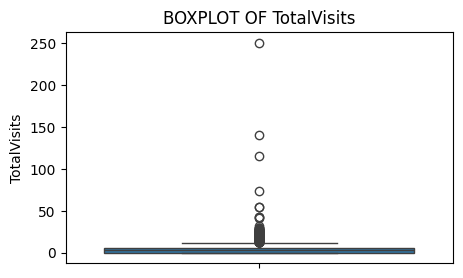

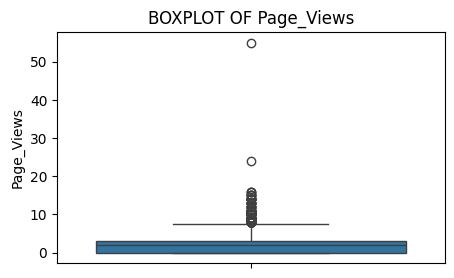

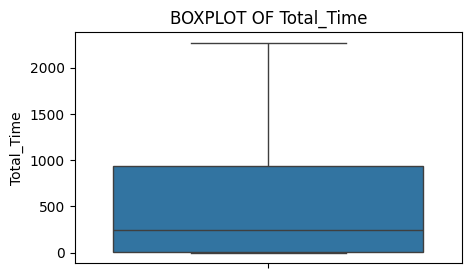

In [46]:
# Checking Boxplot Before Outlier Treatment

for col in numerical_col:
    fig, ax = plt.subplots(figsize=(5,3))
    sns.boxplot(leads[col])
    plt.title(f"BOXPLOT OF {col}")
    plt.show()

**APPROACH:** Handling Outliers by Capping / Winsorization

In [47]:
# Describing percentiles Before Outlier Treatment

leads.describe(percentiles = [.25,.50,.75,.95])

Do Not Email    Converted  TotalVisits   Total_Time   Page_Views  \
count   9240.000000  9240.000000  9240.000000  9240.000000  9240.000000   
mean       0.079437     0.385390     3.394156   487.698268     2.327787   
std        0.270435     0.486714     4.836682   548.021466     2.164258   
min        0.000000     0.000000     0.000000     0.000000     0.000000   
25%        0.000000     0.000000     0.000000    12.000000     0.000000   
50%        0.000000     0.000000     3.000000   248.000000     2.000000   
75%        0.000000     1.000000     5.000000   936.000000     3.000000   
95%        1.000000     1.000000    10.000000  1562.000000     6.000000   
max        1.000000     1.000000   251.000000  2272.000000    55.000000   

         Free_Copy  
count  9240.000000  
mean      0.312554  
std       0.463559  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       1.000000  
95%       1.000000  
max       1.000000

In [48]:
def handling_outliers(df, column):
    for i in column:
        Q1 = leads[i].describe()["25%"]
        Q3 = leads[i].describe()["75%"]
        IQR = Q3 - Q1

        upper = Q3 + 1.5 * IQR
        lower = Q1 - 1.5 * IQR

        leads[i] = np.where(leads[i] > upper, upper, leads[i]) # Winsorizing or Capping upper bound

        leads[i] = np.where(leads[i] < lower, lower, leads[i]) # Winsorizing or Capping lower bound

In [49]:
winsor_cols = ["TotalVisits", "Page_Views"]

In [50]:
handling_outliers(leads, winsor_cols)

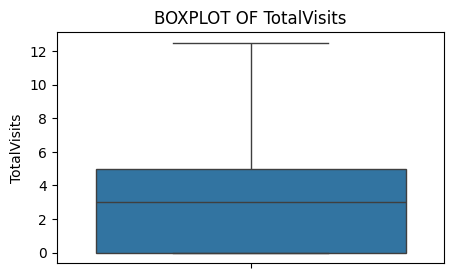

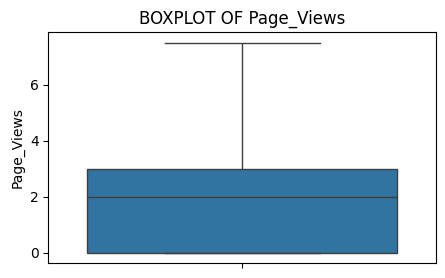

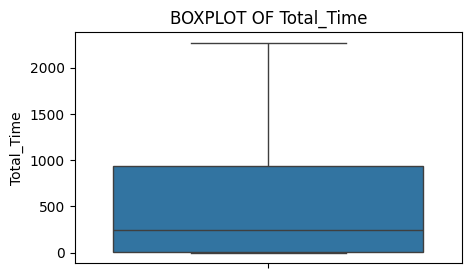

In [51]:
# Checking Boxplot After Outlier Treatment

for col in numerical_col:
    fig, ax = plt.subplots(figsize=(5,3))
    sns.boxplot(leads[col])
    plt.title(f"BOXPLOT OF {col}")
    plt.show()

In [52]:
# Describing percentiles After Outlier Treatment

leads.describe(percentiles = [.25,.50,.75,.95])

Do Not Email    Converted  TotalVisits   Total_Time   Page_Views  \
count   9240.000000  9240.000000  9240.000000  9240.000000  9240.000000   
mean       0.079437     0.385390     3.213853   487.698268     2.274987   
std        0.270435     0.486714     3.005136   548.021466     1.917776   
min        0.000000     0.000000     0.000000     0.000000     0.000000   
25%        0.000000     0.000000     0.000000    12.000000     0.000000   
50%        0.000000     0.000000     3.000000   248.000000     2.000000   
75%        0.000000     1.000000     5.000000   936.000000     3.000000   
95%        1.000000     1.000000    10.000000  1562.000000     6.000000   
max        1.000000     1.000000    12.500000  2272.000000     7.500000   

         Free_Copy  
count  9240.000000  
mean      0.312554  
std       0.463559  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       1.000000  
95%       1.000000  
max       1.000000

**Outliers Check Completed !!!**

**Now, the data is Clean!!!**

# Exploratory Data Analysis

### **Data Imbalance Check**
- Data imbalance occurs when one value is present in majority while the other is in minority, resulting in an uneven distribution of observations in data
- Data imbalance is performed in case of Target variable.
- "Converted" (Target) tells whether a past lead was converted or not.

  **1** means it was **Converted**
  
  **0** means it was **Not Converted**

In [53]:
leads['Converted'].value_counts()

Converted
0    5679
1    3561
Name: count, dtype: int64

In [54]:
target_imbalance = leads['Converted'].value_counts(normalize = True) * 100
round(target_imbalance, 1)

Converted
0    61.5
1    38.5
Name: proportion, dtype: float64

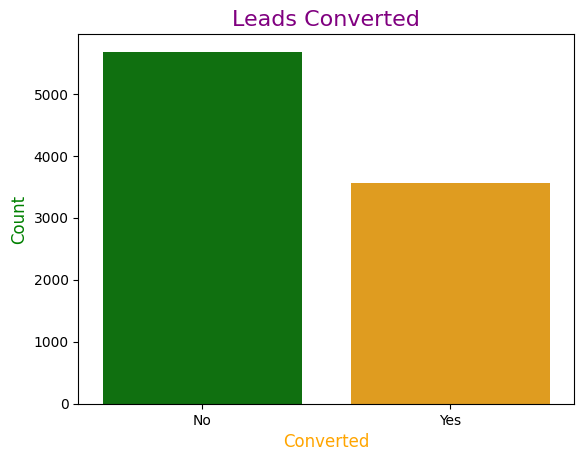

In [55]:
# Using countplot to visualize Data Imbalance
sns.countplot(x= 'Converted', data= leads, palette = ['green','orange'] )

# Adding title and font formatting
plt.title('Leads Converted', fontsize= 16, fontweight= 12, color= 'Purple')

# Axes Labelling
plt.xlabel('Converted', fontsize=12, fontweight=20, color='Orange')
plt.ylabel("Count", fontsize=12, fontweight=20, color='Green')

# Setting xticks
plt.xticks([0,1],["No","Yes"])
plt.xticks(rotation=0)
plt.show()

Visualization in terms of percentage

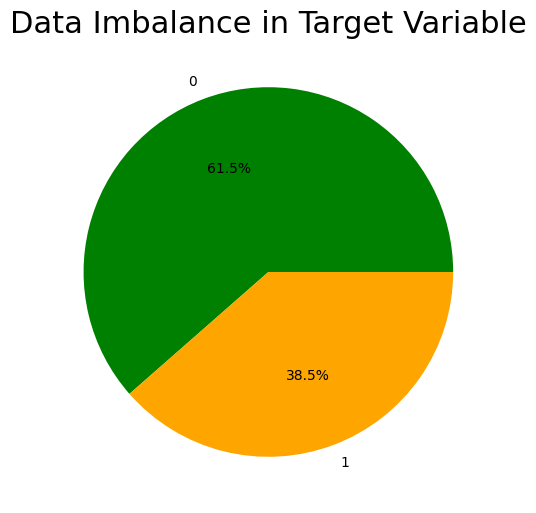

In [56]:
# PIE CHART

plt.figure(figsize=(6, 6))
plt.pie(target_imbalance, labels = target_imbalance.index, autopct='%1.1f%%', colors=['green', 'orange'])
plt.title('Data Imbalance in Target Variable', fontsize = 22)
plt.show()

### Observation:
- 61.5% of the data contains Not Converted leads (Majority)
- 38.5% of the data contains Converted leads (Minority)
- Hence, Conversion rate is 38.5%.

In [57]:
not_converted = leads.loc[leads['Converted'] == 0]                   # Not Converted

converted = leads.loc[leads['Converted'] == 1]                       # Converted

In [58]:
# Data Imbalance Ratio

imbalance_ratio = round( len(not_converted) / len(converted), 2)
imbalance_ratio

1.59

# UNIVARIATE ANALYSIS

### Categorical Data

In [59]:
cat_column = ['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity', 'Specialization',	'Curr_Occupation', 'Free_Copy']

In [60]:
def value_counts_percent(df, categorical_columns):
    for col in categorical_columns:
        percentage = 100 * df[col].value_counts(normalize= True)
        print(f"Percentage of value_counts for '{col}'\n")
        print(percentage, "\n")
        print("___" * 25, "\n")

In [61]:
value_counts_percent(leads, cat_column)

Percentage of value_counts for 'Lead Origin'

Lead Origin
Landing Page Submission    52.878788
API                        38.744589
Lead Add Form               7.770563
Lead Import                 0.595238
Quick Add Form              0.010823
Name: proportion, dtype: float64 

___________________________________________________________________________ 

Percentage of value_counts for 'Lead Source'

Lead Source
Google              31.482684
Direct Traffic      27.521645
Olark Chat          18.993506
Organic Search      12.489177
Reference            5.779221
Welingak Website     1.536797
Referral Sites       1.352814
Facebook             0.595238
Others               0.248918
Name: proportion, dtype: float64 

___________________________________________________________________________ 

Percentage of value_counts for 'Do Not Email'

Do Not Email
0    92.056277
1     7.943723
Name: proportion, dtype: float64 

___________________________________________________________________________ 



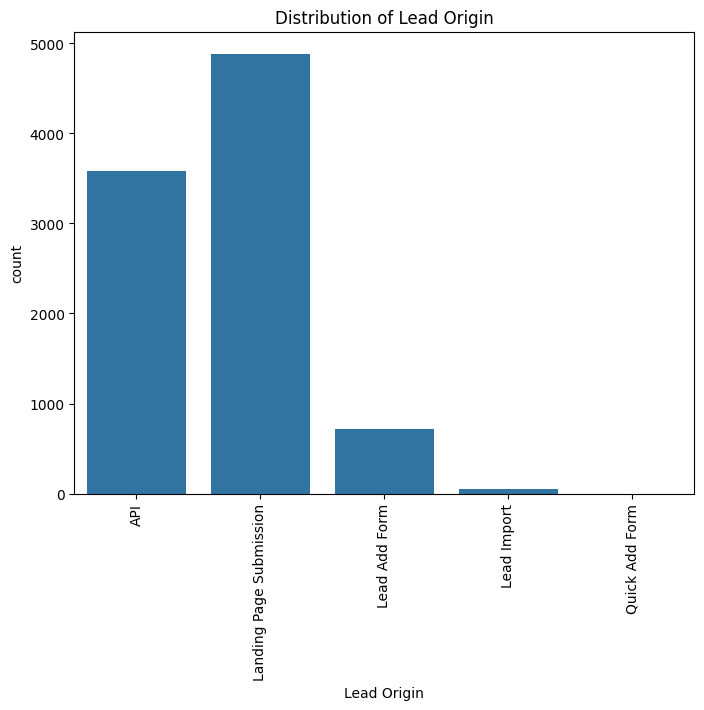

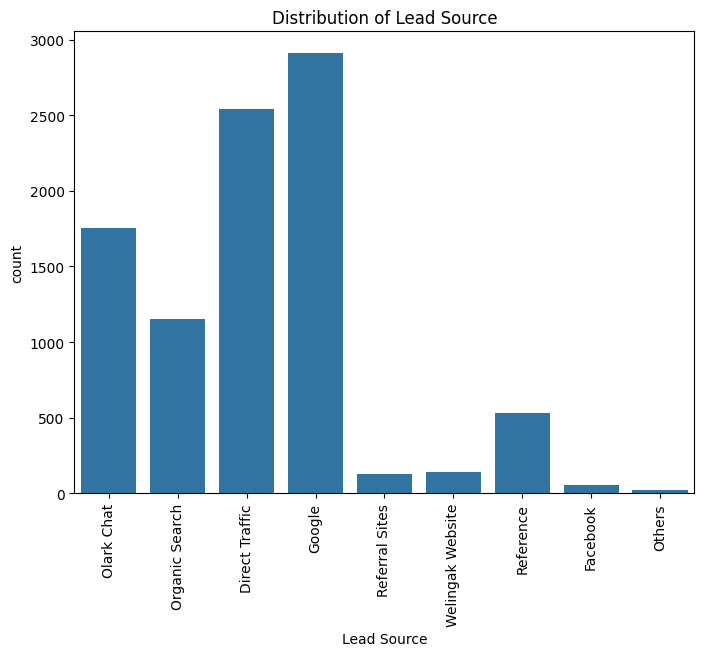

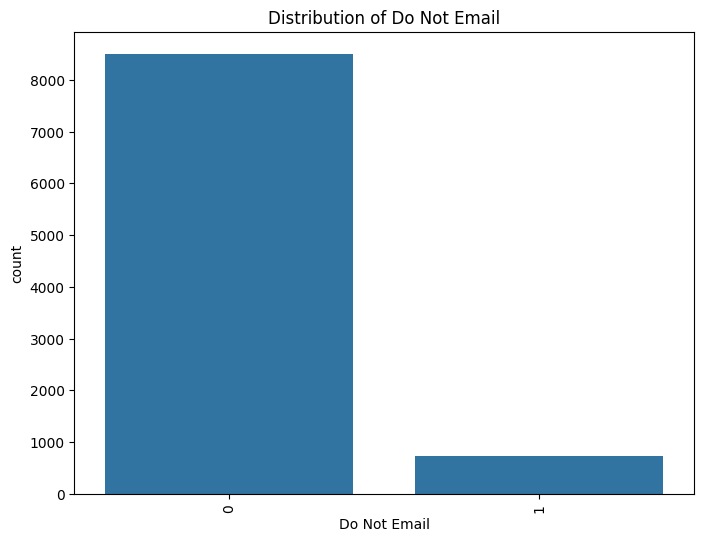

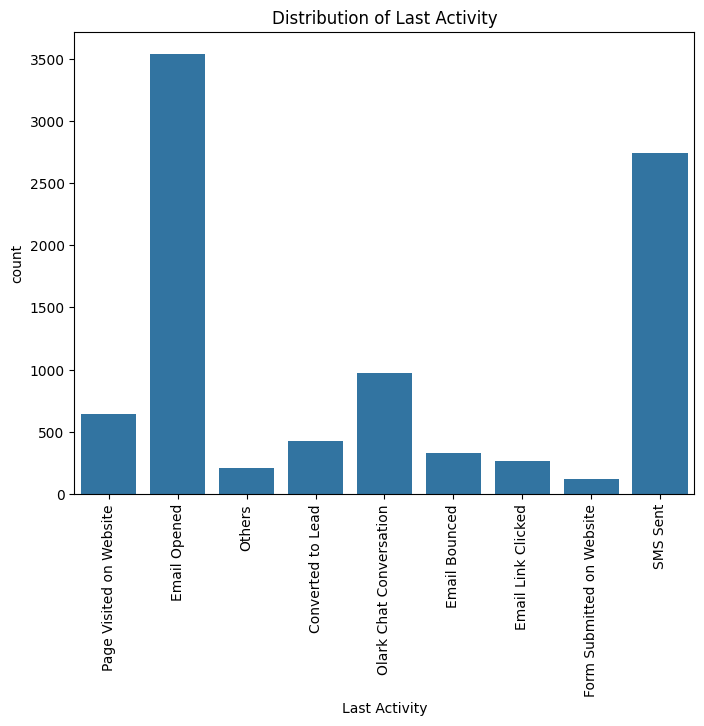

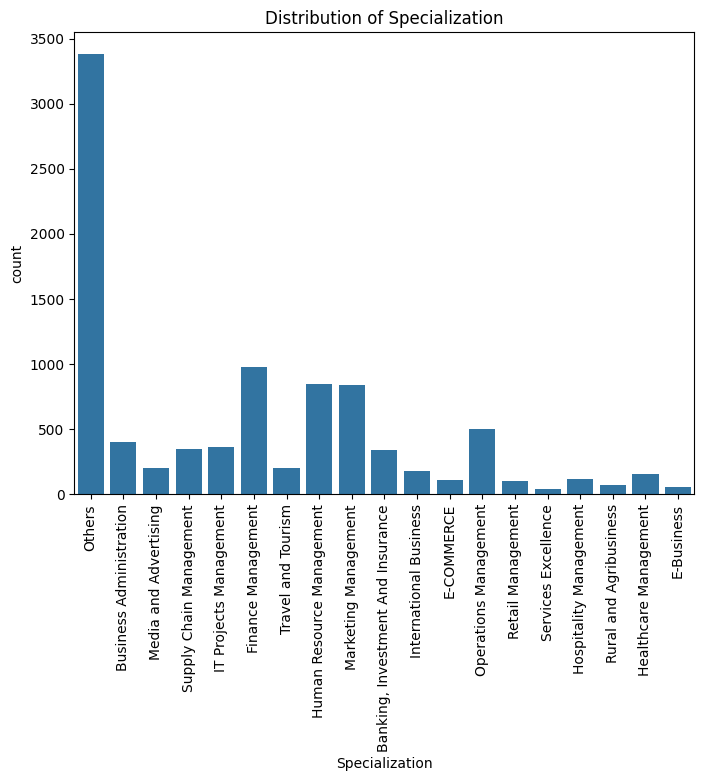

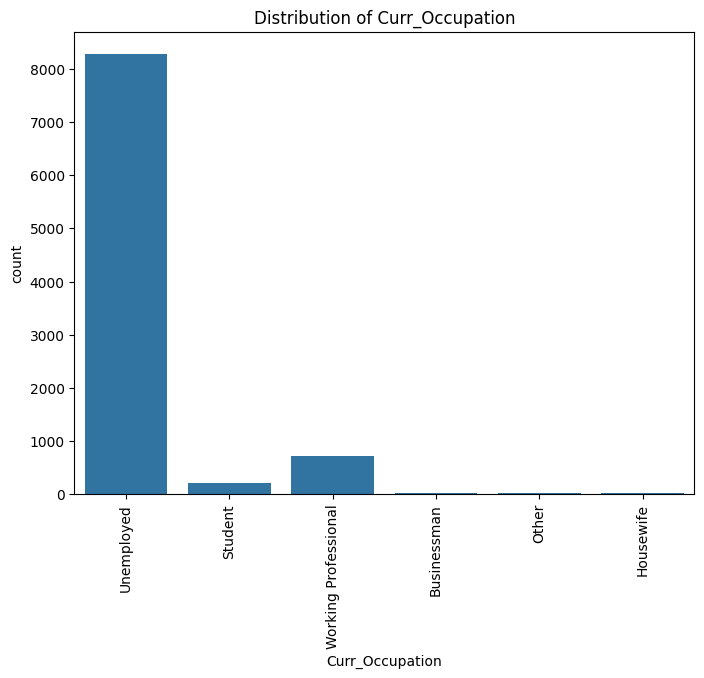

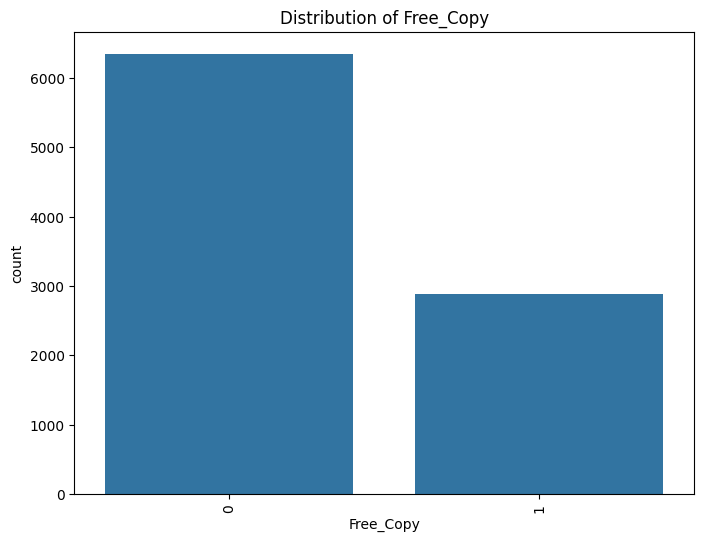

In [62]:
# Using countplot

for col in cat_column:
    plt.figure(figsize=(8,6))
    sns.countplot(x=leads[col])
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=90)
    plt.show()

**Observation:**
- In Univariate Analysis of Categorical columns we get to know the value counts percentage or distribution in each column

- From the following insights we can focus on certain features while performing  **Bivariate analysis** :-
1. **Lead Origin**: "Landing Page Submission" identified most of the customers, i.e. 53% while "API" identified 39% customers
2. **Curr_Occupation**: has 90% of customers as "Unemployed"
3. **Do Not Email**: 92% of people have opted that they don't want to be emailed about the course
4. **Lead Source**: 58% is from Google & Direct Traffic combined
5. **Last Activity**: 68% of customers contribution in SMS Sent & Email Opened activities

# BIVARIATE ANALYSIS
### 1. Categorical-Categorical (Both Categorical)

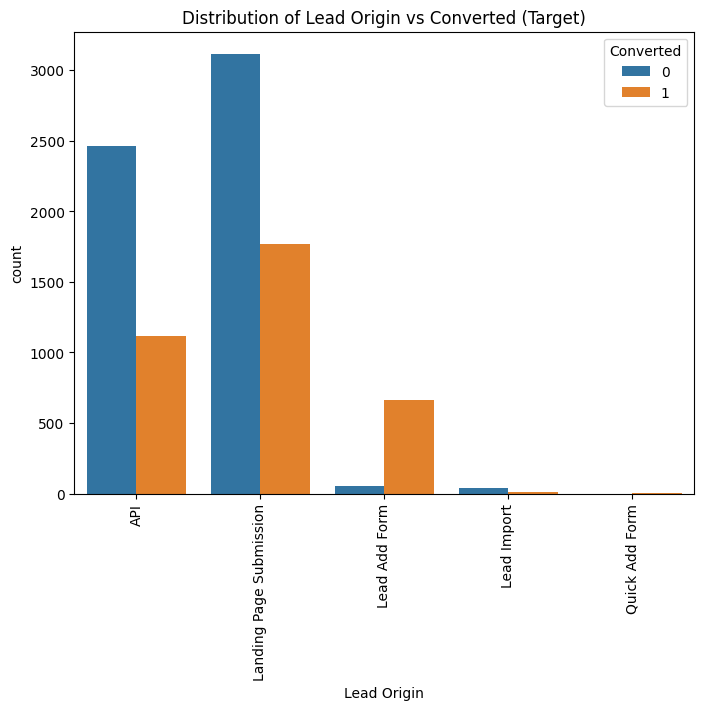

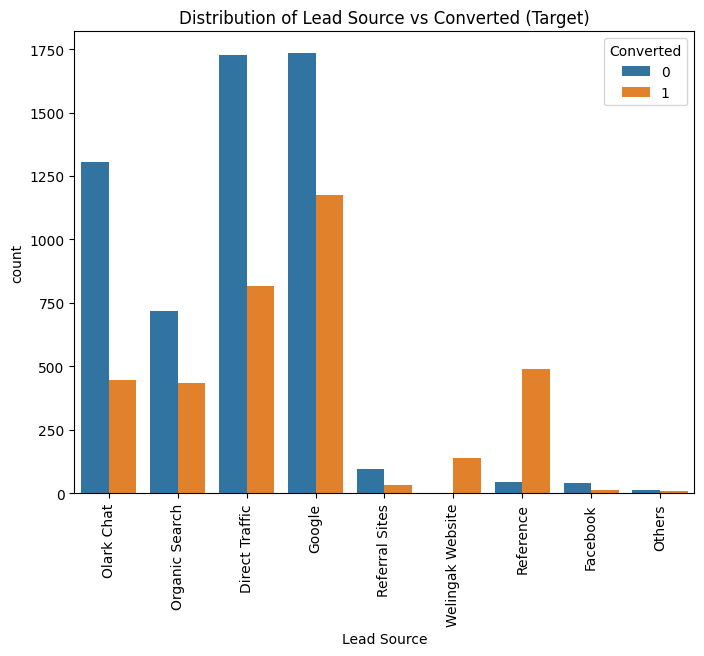

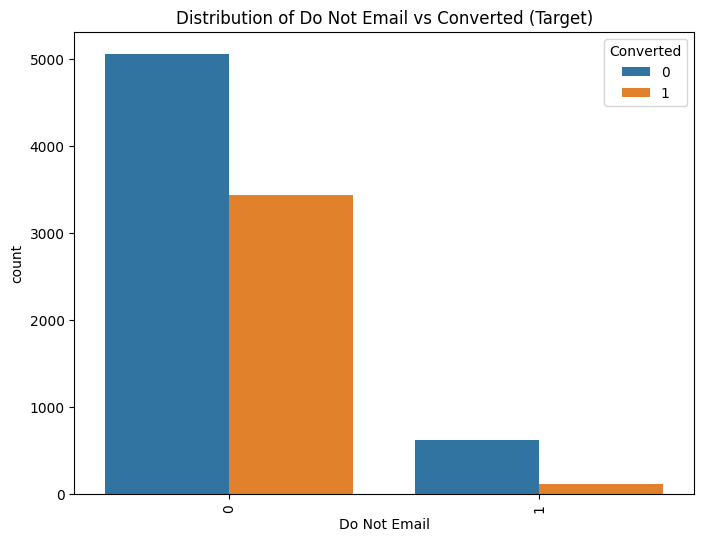

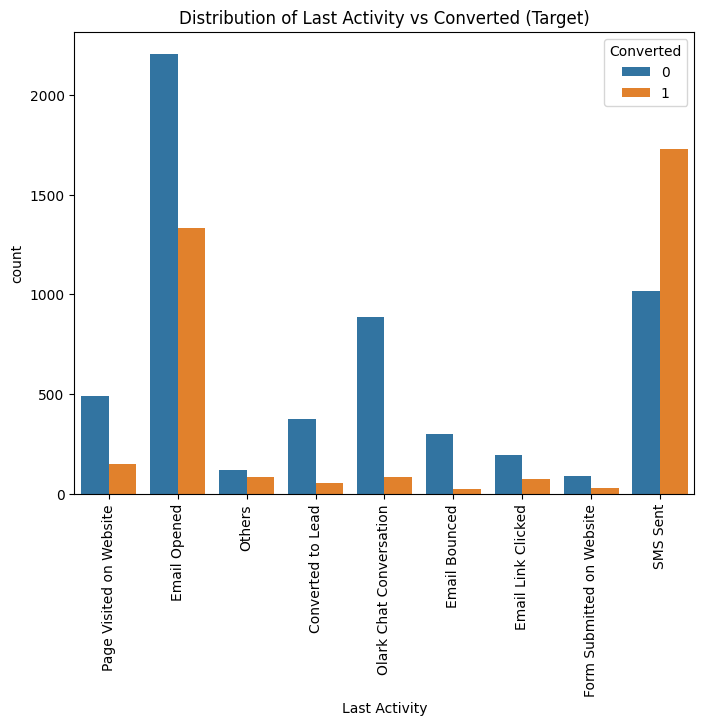

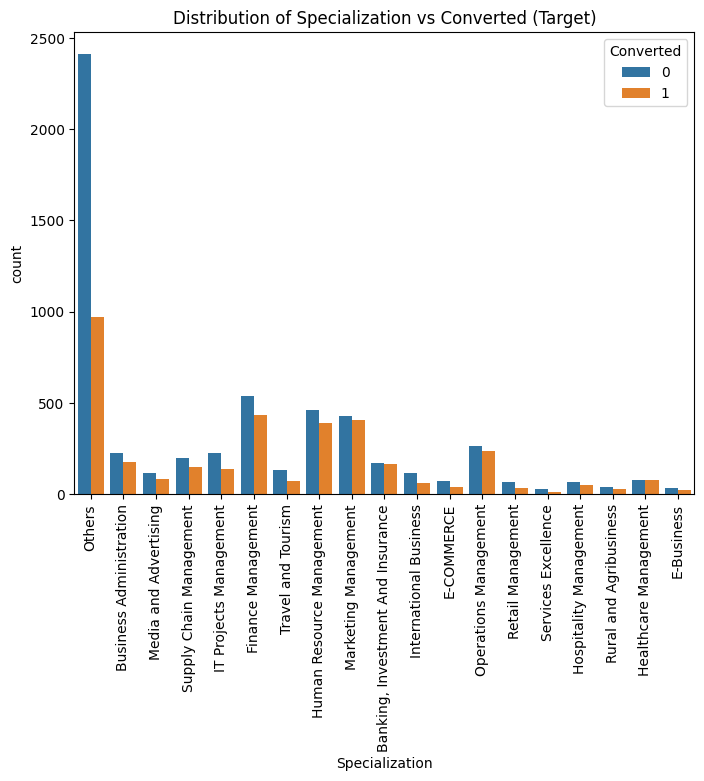

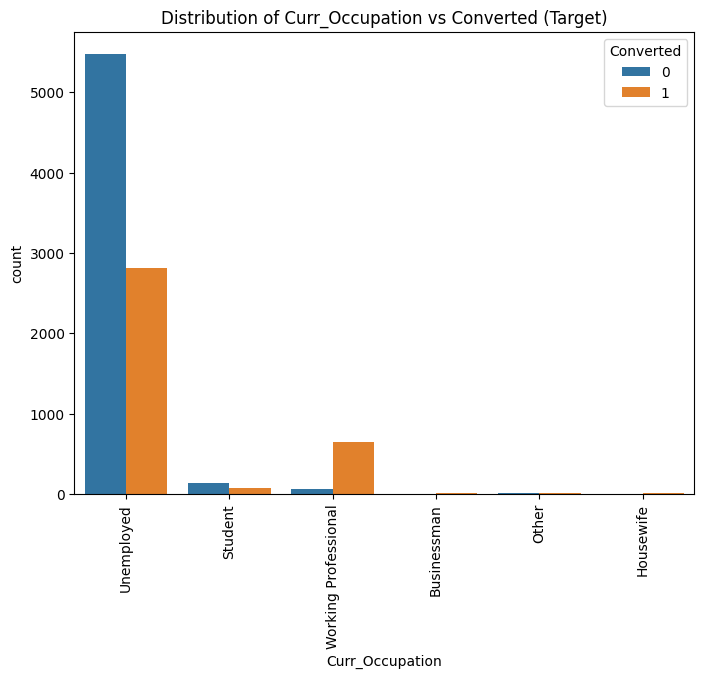

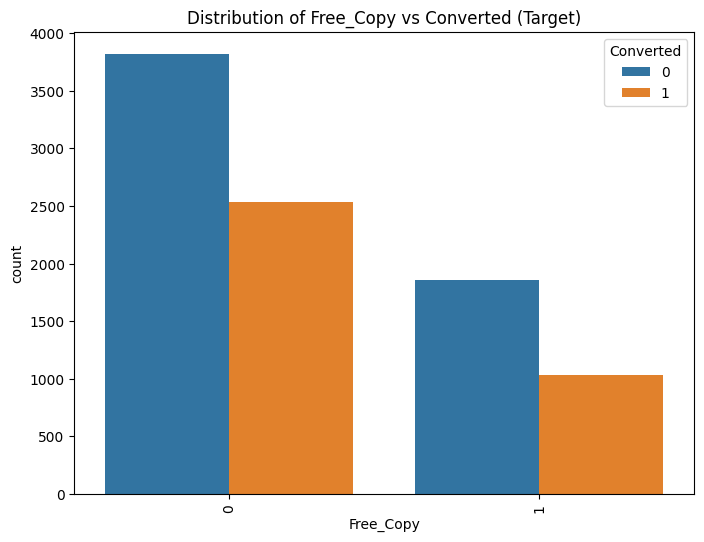

In [63]:
for col in cat_column:
    plt.figure(figsize=(8,6))
    sns.countplot(data= leads, x= col, hue= 'Converted')
    plt.title(f"Distribution of {col} vs Converted (Target)")
    plt.xticks(rotation= 90)
    plt.show()

In [64]:
def bivariate_analysis(df, cat_columns, target):
    for col in cat_columns:
        print(f"Percentage distribution for '{target}' by '{col}':\n")
        percentage_df = df.groupby(col)[target].value_counts(normalize= True).mul(100).rename('percentage').reset_index()
        print(percentage_df)
        print("\n" + "___" * 25 + "\n")

bivariate_analysis(leads, cat_column, 'Converted')

Percentage distribution for 'Converted' by 'Lead Origin':

               Lead Origin  Converted  percentage
0                      API          0   68.854749
1                      API          1   31.145251
2  Landing Page Submission          0   63.814982
3  Landing Page Submission          1   36.185018
4            Lead Add Form          1   92.479109
5            Lead Add Form          0    7.520891
6              Lead Import          0   76.363636
7              Lead Import          1   23.636364
8           Quick Add Form          1  100.000000

___________________________________________________________________________

Percentage distribution for 'Converted' by 'Lead Source':

         Lead Source  Converted  percentage
0     Direct Traffic          0   67.833268
1     Direct Traffic          1   32.166732
2           Facebook          0   76.363636
3           Facebook          1   23.636364
4             Google          0   59.573737
5             Google          1   40.426

**Observation:**
1. **Lead Origin:**
- 52% of leads originated from "Landing Page Submission" with lead conversion rate = 36%
- "API" identified 39% of customers with lead conversion rate = 31%
2. **Curr_Occupation:**
- 90% of customers are "Unemployed" with lead conversion rate = 34%
- Only 7.6% of Working Professional contribute with almost 92% lead conversion rate
3. **Lead Source:**
- Google has lead conversion rate = 40% out of 31% customers
- Direct Traffic has lead conversion rate = 32% with 27% customers which is lower than Google
- Organic Search has lead conversion rate = 37.8% but the contribution of customers = 12.5%
- Reference has lead conversion rate = 91% but there are only around 6% of customers through this Lead Source
4. **Last Activity:**
- 'SMS Sent' has high lead conversion rate = 63% with 30% contribution from last activities
- 'Email Opened' activity contributed 38% of last activities performed by customers with lead conversion rate = 37%
5. **Specialization:**
- Specializations like Marketing Managemt, HR Management, Finance Management show good contribution in the context of lead conversion rate

### 2. Numerical-Categorical (One Numerical variable and One Categorical variable)

In [65]:
numerical_col

['TotalVisits', 'Page_Views', 'Total_Time']

<Figure size 1600x400 with 0 Axes>

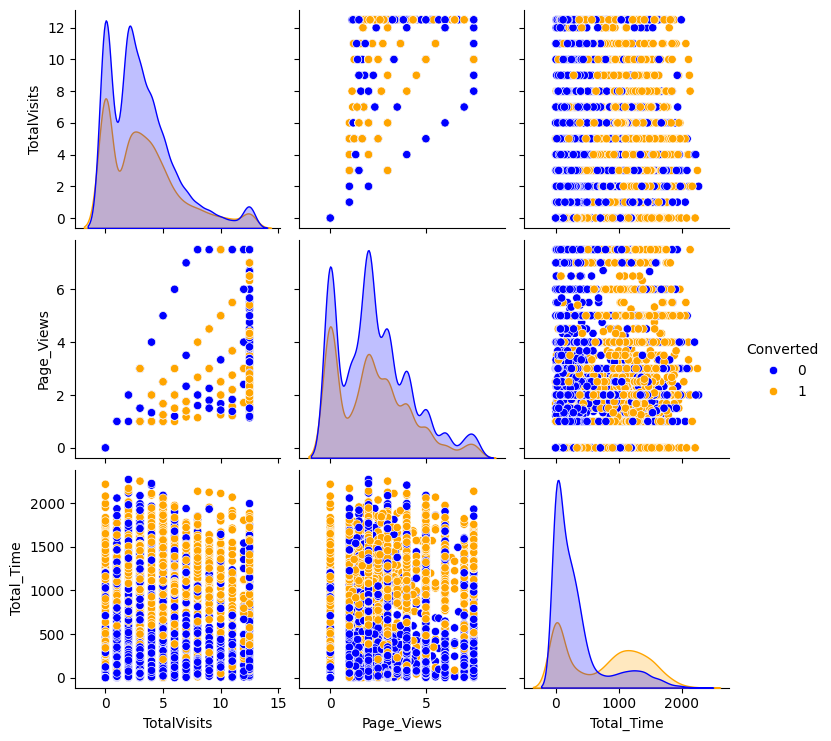

In [66]:
# Using pairplot

plt.figure(figsize=(16, 4))
sns.pairplot(data= leads, vars= numerical_col, hue= "Converted", palette= ['blue', 'orange'])
plt.show()

# MULTIVARIATE ANALYSIS

In [67]:
# Using Numerical column (Converted included)

num_col = ["TotalVisits", "Page_Views", "Total_Time", "Converted"]

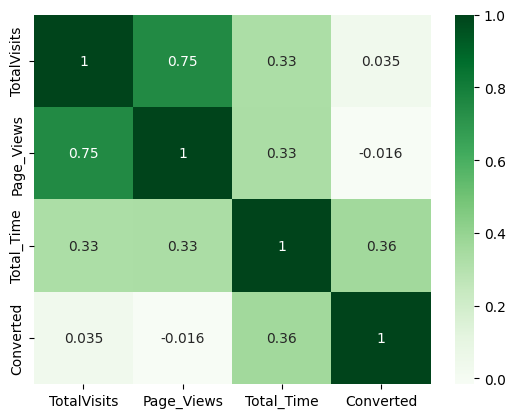

In [68]:
# Using heatmap

sns.heatmap(leads[num_col].corr(), annot= True, cmap= 'Greens')
plt.show()

**Observation:**
- Page_Views shows somewhat good correlation with TotalVisits, i.e., 75%

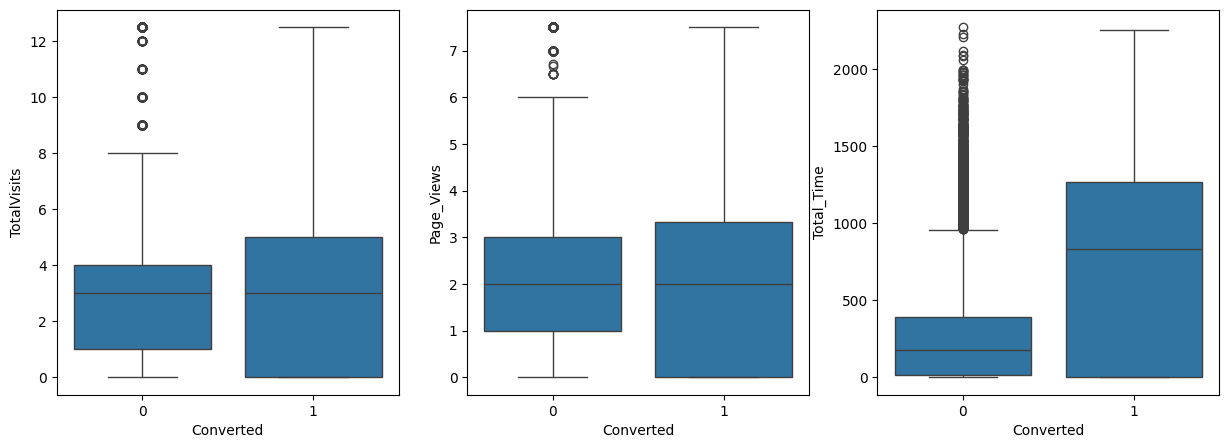

In [69]:
# Using boxplot with hue = Converted (target)

plt.figure(figsize=(15, 5))

# TotalVisits
plt.subplot(1,3,1)
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = leads)

# Page_Views
plt.subplot(1,3,2)
sns.boxplot(y = 'Page_Views', x = 'Converted', data = leads)

# Total_Time
plt.subplot(1,3,3)
sns.boxplot(y = 'Total_Time', x = 'Converted', data = leads)
plt.show()

**Observation:**
- As per boxplot, past Leads who have spent more time on Website are successfully converted than those who spent less time

# Data Preparation

### Creating Dummy Variables
- For categorical data with multiple levels/categories, we create dummy features (using one-hot encoding)
- We have already performed mapping of binary data to 1/0

In [70]:
cat_column

['Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Last Activity',
 'Specialization',
 'Curr_Occupation',
 'Free_Copy']

In [71]:
# Creating dummy variable for some categorical variables, using drop_first and datatype
dummy = pd.get_dummies(leads[["Lead Origin","Lead Source","Last Activity","Specialization","Curr_Occupation"]], drop_first=True, dtype= 'int')

# Concatenating / Adding results to the original data
leads = pd.concat([leads, dummy], axis=1)

In [72]:
leads.head(3)

Lead Origin     Lead Source  Do Not Email  Converted  \
0                      API      Olark Chat             0          0   
1                      API  Organic Search             0          0   
2  Landing Page Submission  Direct Traffic             0          1   

   TotalVisits  Total_Time  Page_Views            Last Activity  \
0          0.0           0         0.0  Page Visited on Website   
1          5.0         674         2.5             Email Opened   
2          2.0        1532         2.0             Email Opened   

            Specialization Curr_Occupation  Free_Copy  \
0                   Others      Unemployed          0   
1                   Others      Unemployed          0   
2  Business Administration         Student          1   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   

   Lead Origin_Lead Import  Lead Origin_Quick Add Form  Lead Source_Facebook  \
0                        0                           0                     0   
1                        0                           0                     0   
2                        0                           0                     0   

   Lead Source_Google  Lead Source_Olark Chat  Lead Source_Organic Search  \
0                   0                       1                           0   
1                   0                       0                           1   
2                   0                       0                           0   

   Lead Source_Others  Lead Source_Reference  Lead Source_Referral Sites  \
0                   0                      0                           0   
1                   0                      0                           0   
2                   0                      0                           0   

   Lead Source_Welingak Website  Last Activity_Email Bounced  \
0                             0                            0   
1                             0                            0   
2                             0                            0   

   Last Activity_Email Link Clicked  Last Activity_Email Opened  \
0                                 0                           0   
1                                 0                           1   
2                                 0                           1   

   Last Activity_Form Submitted on Website  \
0                                        0   
1                                        0   
2                                        0   

   Last Activity_Olark Chat Conversation  Last Activity_Others  \
0                                      0                     0   
1                                      0                     0   
2                                      0                     0   

   Last Activity_Page Visited on Website  Last Activity_SMS Sent  \
0                                      1                       0   
1                                      0                       0   
2                                      0                       0   

   Specialization_Business Administration  Specialization_E-Business  \
0                                       0                          0   
1                                       0                          0   
2                                       1                          0   

   Specialization_E-COMMERCE  Specialization_Finance Management  \
0                          0                                  0   
1                          0                                  0   
2                          0                                  0   

   Specialization_Healthcare Management  \
0                                     0   
1                                     0   
2                                     0   

   Specialization_Hospitality Management

In [73]:
# We have created dummies for the below variables, so we can drop them

leads.drop(["Lead Origin","Lead Source","Last Activity","Specialization","Curr_Occupation"], axis= 1, inplace = True)

In [74]:
# Let's check shape of data

leads.shape

(9240, 49)

In [75]:
# Let's check information like datatype of all columns

leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 49 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Do Not Email                              9240 non-null   int64  
 1   Converted                                 9240 non-null   int64  
 2   TotalVisits                               9240 non-null   float64
 3   Total_Time                                9240 non-null   int64  
 4   Page_Views                                9240 non-null   float64
 5   Free_Copy                                 9240 non-null   int64  
 6   Lead Origin_Landing Page Submission       9240 non-null   int64  
 7   Lead Origin_Lead Add Form                 9240 non-null   int64  
 8   Lead Origin_Lead Import                   9240 non-null   int64  
 9   Lead Origin_Quick Add Form                9240 non-null   int64  
 10  Lead Source_Facebook                

# Train-Test Split

In [76]:
# Segregating predictor and Target Variables

X = leads.drop('Converted',axis=1)

y = leads['Converted']

In [77]:
# Splitting data into training and testing data

Xtrain,XTest,yTrain,yTest=train_test_split(X,y, test_size=0.3,random_state=100)

In [78]:
# Let's check shape of Training data

print(f"X_train : {Xtrain.shape}, y_train : {yTrain.shape}")

X_train : (6468, 48), y_train : (6468,)


In [79]:
# Let's check shape of Testing data

print(f"X_test : {XTest.shape}, y_test : {yTest.shape}")

X_test : (2772, 48), y_test : (2772,)


# Feature Scaling

In [80]:
numerical_col    # Numerical column to be scaled

['TotalVisits', 'Page_Views', 'Total_Time']

In [81]:
# Scaling the features

scaler = StandardScaler()

In [82]:
# Scaling the features on Training data

Xtrain[numerical_col] = scaler.fit_transform(Xtrain[numerical_col])
Xtrain[numerical_col].head(5)

TotalVisits  Page_Views  Total_Time
1871    -1.064974   -1.184892   -0.885371
6795     0.262370   -0.488713    0.005716
3516     0.594206    0.123715   -0.691418
8105     0.594206    1.432322    1.365219
3934    -1.064974   -1.184892   -0.885371

In [83]:
# Let's check Lead Conversion Rate (LCR) - "Converted" is our Target Variable

LCR = (sum(leads['Converted'])/len(leads['Converted'].index)) * 100
round(LCR, 2)

38.54

**Observation:**
- The value of Lead Conversion rate is 38.54%

# Visualizing Correlations

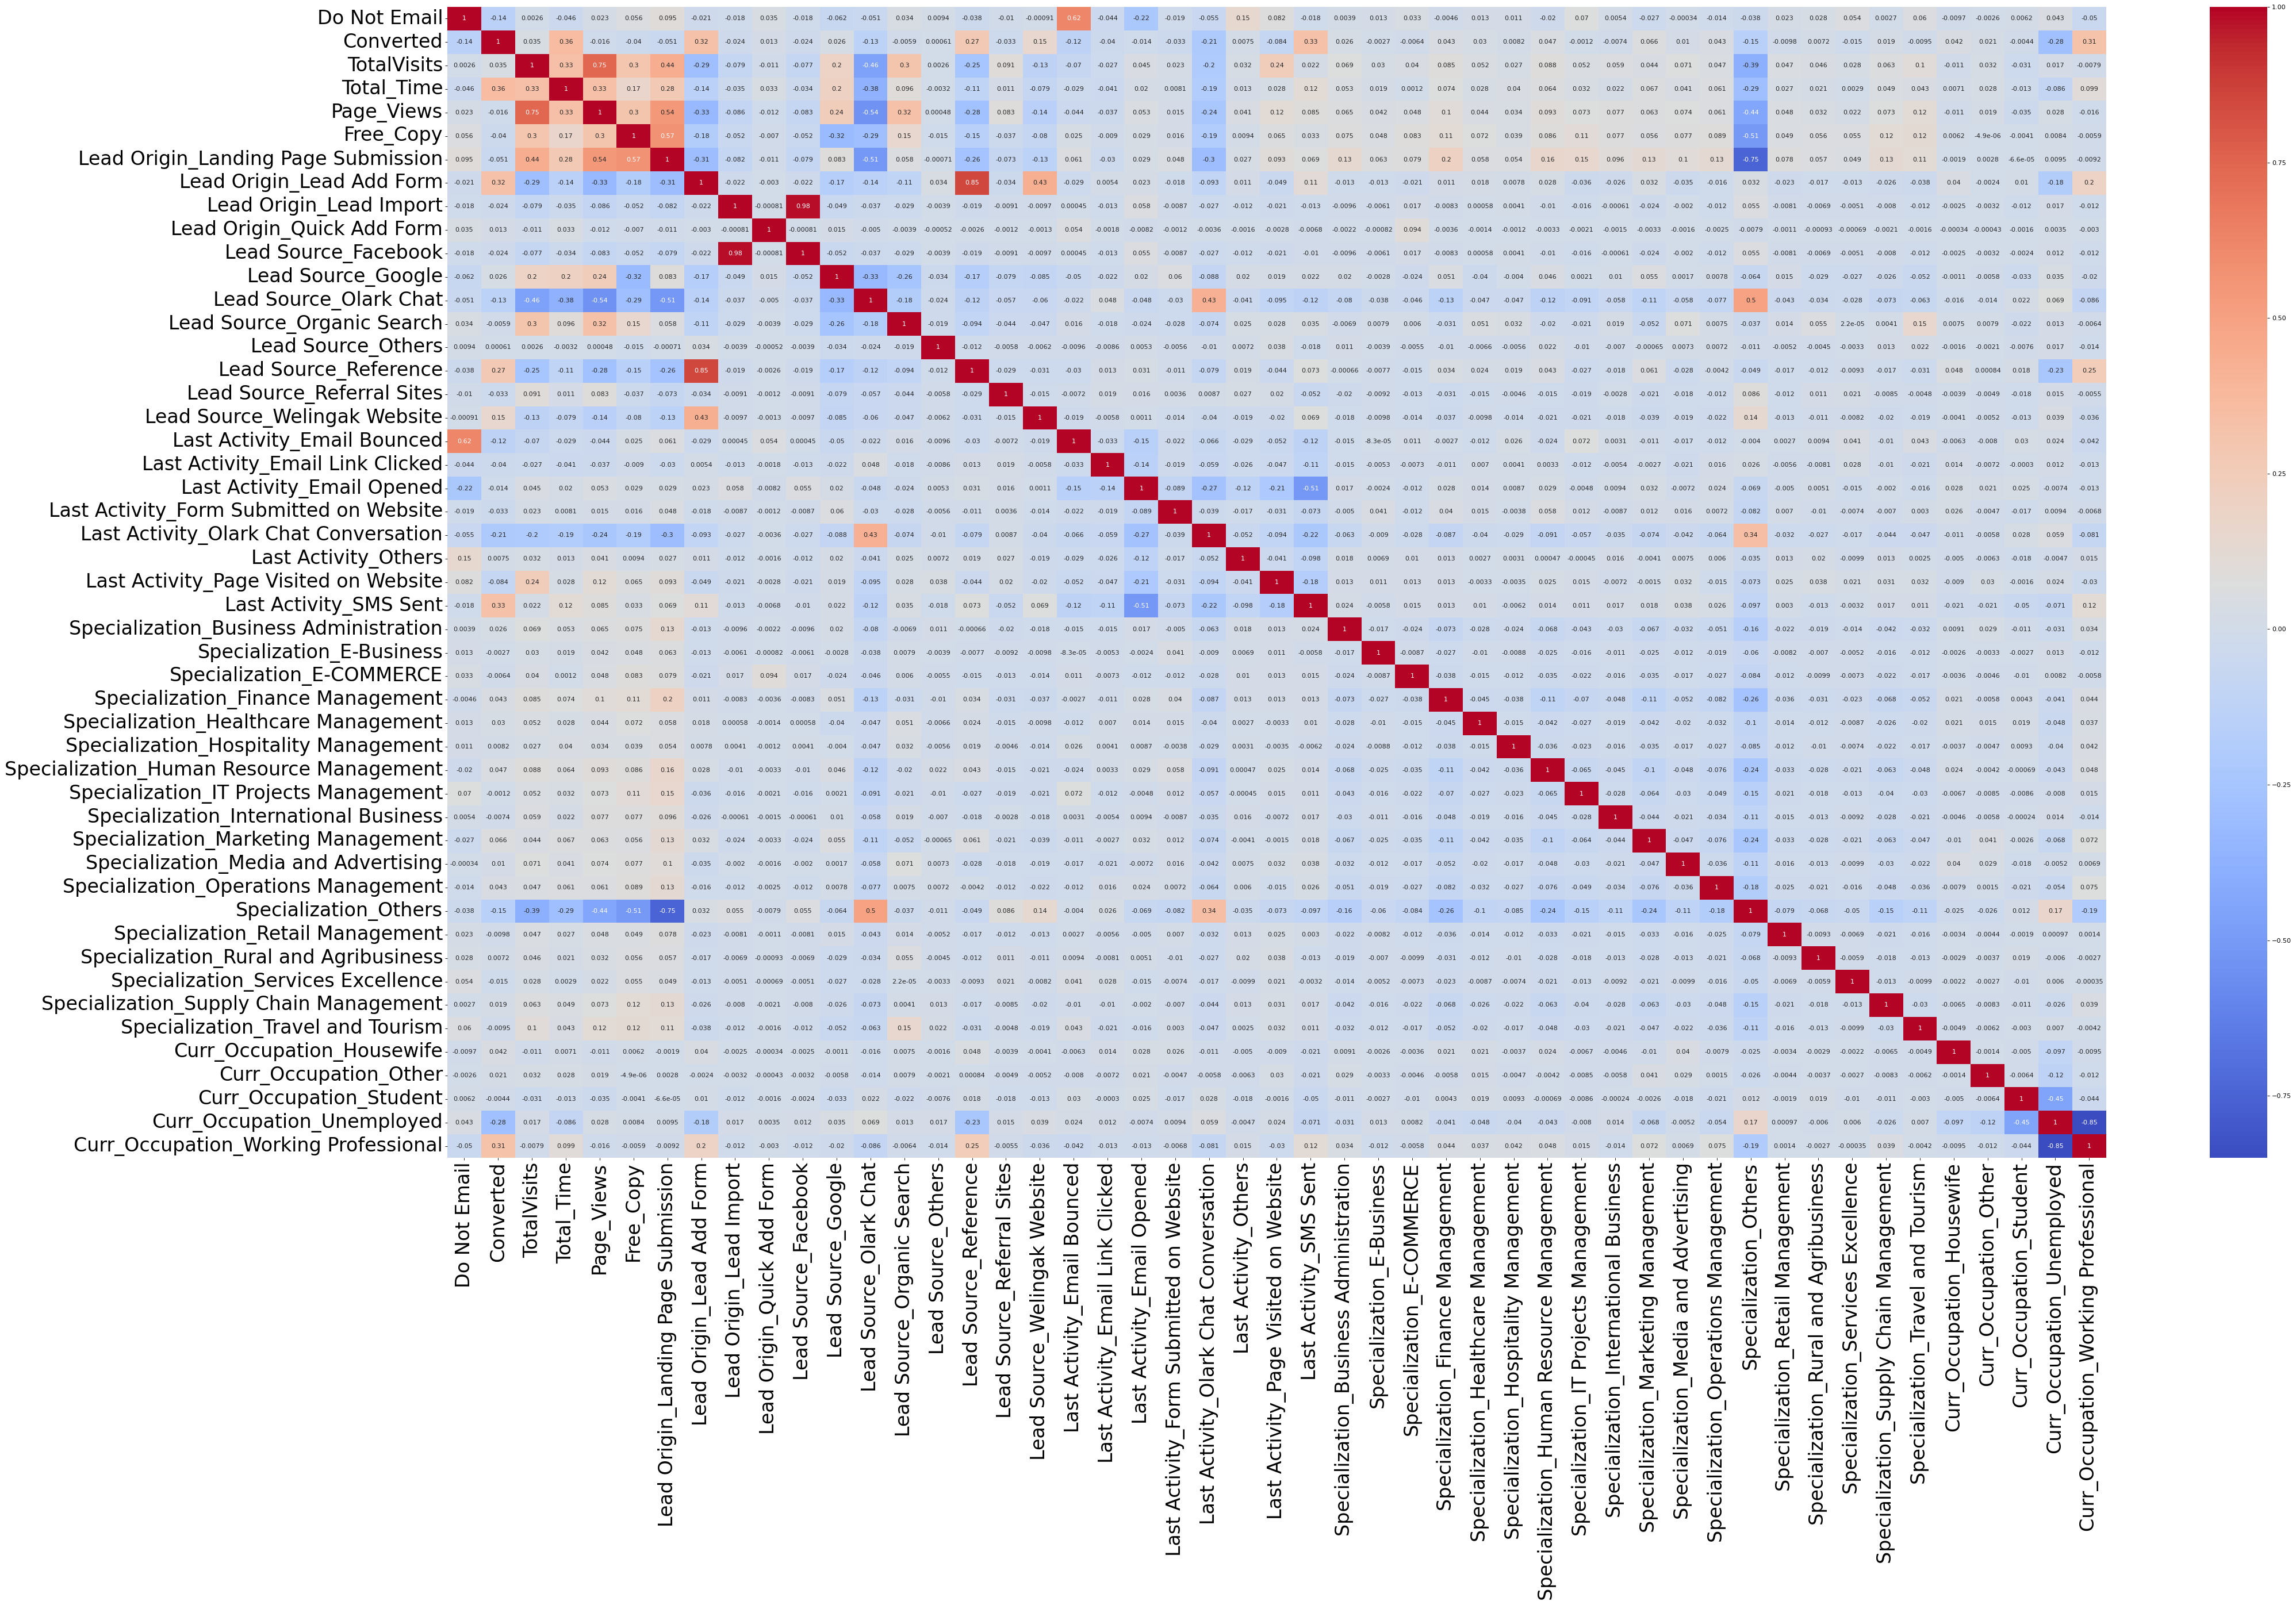

In [84]:
# Let's analyze using correlation matrix

plt.figure(figsize = (55, 35),dpi=80)
sns.heatmap(leads.corr(), annot = True, cmap= "coolwarm")
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.tight_layout()
plt.show()

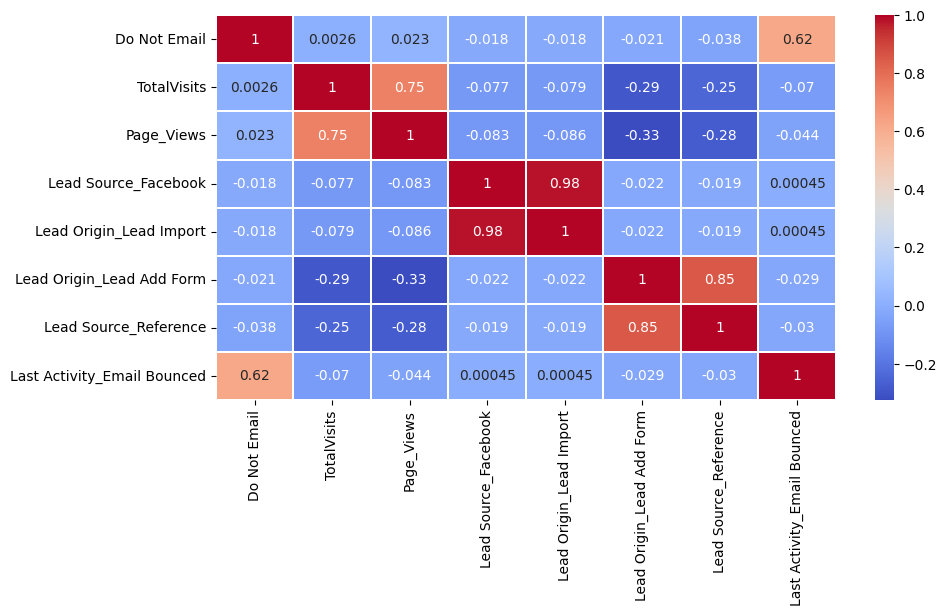

In [85]:
# Let's have a closer look of heatmap

plt.figure(figsize = (10,5))
sns.heatmap(leads[["Do Not Email", "TotalVisits", "Page_Views", "Lead Source_Facebook","Lead Origin_Lead Import","Lead Origin_Lead Add Form","Lead Source_Reference", "Last Activity_Email Bounced"]].corr(),linewidths=0.01,cmap="coolwarm",annot=True)
plt.show()

**Observation:**
- The predictor variables above are highly correlated with each other near diagonal (0.98 and 0.85)
- We may consider keeping it now as it may be removed while selecting features using Recursive Feature Elimination.

# Model Building
- We will use Logistic Regression Model for Model Building in order to predict categorical variables.
- We will also perform Feature Selection Using Recursive Feature Elimination (RFE) - Coarse tuning
- Then we will use Manual Feature Elimination - Fine tuning using p-values and VIFs.

### 8.1 Feature Selection Using RFE (Recursive Feature Elimination)

In [86]:
# Initializing Logistic Regression Estimator
log_estimator = LogisticRegression()

# Selecting features using Recursive Feature Elimination (RFE)
rfe = RFE(log_estimator, n_features_to_select= 15)
rfe = rfe.fit(Xtrain, yTrain)

In [87]:
# Let's check for top 15 features as chosen by RFE

top_15 = pd.DataFrame()
top_15['features']=Xtrain.columns
top_15['Feature Chosen'] = rfe.support_
top_15['Ranking']=rfe.ranking_
top_15.sort_values(by='Ranking')

features  Feature Chosen  Ranking
0                               Do Not Email            True        1
43                 Curr_Occupation_Housewife            True        1
37                     Specialization_Others            True        1
30     Specialization_Hospitality Management            True        1
24                    Last Activity_SMS Sent            True        1
46                Curr_Occupation_Unemployed            True        1
22                      Last Activity_Others            True        1
21     Last Activity_Olark Chat Conversation            True        1
19                Last Activity_Email Opened            True        1
16              Lead Source_Welingak Website            True        1
11                    Lead Source_Olark Chat            True        1
47      Curr_Occupation_Working Professional            True        1
2                                 Total_Time            True        1
5        Lead Origin_Landing Page Submission            True        1
6                  Lead Origin_Lead Add Form            True        1
44                     Curr_Occupation_Other           False        2
45                   Curr_Occupation_Student           False        3
9                       Lead Source_Facebook           False        4
39     Specialization_Rural and Agribusiness           False        5
33     Specialization_International Business           False        6
38          Specialization_Retail Management           False        7
4                                  Free_Copy           False        8
18          Last Activity_Email Link Clicked           False        9
1                                TotalVisits           False       10
3                                 Page_Views           False       11
14                     Lead Source_Reference           False       12
13                        Lead Source_Others           False       13
8                 Lead Origin_Quick Add Form           False       14
7                    Lead Origin_Lead Import           False       15
23     Last Activity_Page Visited on Website           False       16
25    Specialization_Business Administration           False       17
36      Specialization_Operations Management           False       18
31  Specialization_Human Resource Management           False       19
34       Specialization_Marketing Management           False       20
41    Specialization_Supply Chain Management           False       21
27                 Specialization_E-COMMERCE           False       22
32     Specialization_IT Projects Management           False       23
10                        Lead Source_Google           False       24
40        Specialization_Services Excellence           False       25
12                Lead Source_Organic Search           False       26
29      Specialization_Healthcare Management           False       27
28         Specialization_Finance Management           False       28
17               Last Activity_Email Bounced           False       29
35      Specialization_Media and Advertising           False       30
26                 Specialization_E-Business           False       31
42         Specialization_Travel and Tourism           False       32
20   Last Activity_Form Submitted on Website           False       33
15                Lead Source_Referral Sites           False       34

In [88]:
# Let's check for columns not selected by RFE

Xtrain.columns[~rfe.support_]

Index(['TotalVisits', 'Page_Views', 'Free_Copy', 'Lead Origin_Lead Import',
       'Lead Origin_Quick Add Form', 'Lead Source_Facebook',
       'Lead Source_Google', 'Lead Source_Organic Search',
       'Lead Source_Others', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Page Visited on Website',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising',
       'Specialization_Operations Management',
       'Specialization_Retail Management',
       'Speci

In [89]:
# Let's check the columns selected by RFE

rfe_col = Xtrain.columns[rfe.support_]
rfe_col

Index(['Do Not Email', 'Total_Time', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Last Activity_Email Opened',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Others',
       'Last Activity_SMS Sent', 'Specialization_Hospitality Management',
       'Specialization_Others', 'Curr_Occupation_Housewife',
       'Curr_Occupation_Unemployed', 'Curr_Occupation_Working Professional'],
      dtype='object')

In [90]:
# User Defined Function for calculating VIFs for all columns

def calculate_vif(Xtrain):
    VIF= pd.DataFrame()
    VIF['Features']=Xtrain.columns
    VIF['VIF']=[ variance_inflation_factor(Xtrain,i) for i in range(Xtrain.shape[1])]
    print(VIF.sort_values(by='VIF', ascending=False))

### Model 1

In [91]:
# 15 columns selected by RFE used for this model
rfe_col = Xtrain.columns[rfe.support_]

# Creating X_train dataframe with variables selected by RFE
Xtrain_rfe = Xtrain[rfe_col]

# Adding constant variable
Xtrain_sm1 = smf.add_constant(Xtrain_rfe)

# Fitting the model
log_model_1 = smf.GLM(yTrain, Xtrain_sm1, family = smf.families.Binomial()).fit()

# Let's see the summary of our logistic regression model
print(log_model_1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2686.9
Date:                Mon, 20 May 2024   Deviance:                       5373.7
Time:                        11:45:10   Pearson chi2:                 8.22e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3926
Covariance Type:            nonrobust                                         
                                            coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

**Observation:**
- "**Curr_Occupation_Housewife**" can be dropped due to high p-value of 0.999, which is above accepted threshold of 0.05 for statistical significance.

In [92]:
# Dropping 'Curr_Occupation_Housewife' from data

Xtrain_rfe.drop("Curr_Occupation_Housewife", axis= 1, inplace= True)

### Model 2

In [93]:
# Adding constant variable
Xtrain_sm2 = smf.add_constant(Xtrain_rfe)

# Fitting the model
log_model_2 = smf.GLM(yTrain, Xtrain_sm2, family = smf.families.Binomial()).fit()

# Let's see the summary of our logistic regression model
print(log_model_2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2692.4
Date:                Mon, 20 May 2024   Deviance:                       5384.9
Time:                        11:45:10   Pearson chi2:                 8.23e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3915
Covariance Type:            nonrobust                                         
                                            coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [94]:
calculate_vif(Xtrain_rfe)

                                 Features        VIF
12             Curr_Occupation_Unemployed  11.445937
2     Lead Origin_Landing Page Submission   5.895717
11                  Specialization_Others   4.041027
6              Last Activity_Email Opened   3.064720
9                  Last Activity_SMS Sent   2.651458
4                  Lead Source_Olark Chat   2.268338
7   Last Activity_Olark Chat Conversation   1.857432
13   Curr_Occupation_Working Professional   1.827354
3               Lead Origin_Lead Add Form   1.809594
5            Lead Source_Welingak Website   1.274797
1                              Total_Time   1.254276
0                            Do Not Email   1.234532
8                    Last Activity_Others   1.106427
10  Specialization_Hospitality Management   1.022722


In [95]:
# Dropping 'Curr_Occupation_Unemployed' from data

Xtrain_rfe.drop("Curr_Occupation_Unemployed", axis= 1, inplace= True)

### Model 3

In [96]:
# Adding constant variable
Xtrain_sm3 = smf.add_constant(Xtrain_rfe)

# Fitting the model
log_model_3 = smf.GLM(yTrain, Xtrain_sm3, family = smf.families.Binomial()).fit()

# Let's see the summary of our logistic regression model
print(log_model_3.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2695.7
Date:                Mon, 20 May 2024   Deviance:                       5391.4
Time:                        11:45:11   Pearson chi2:                 8.26e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3909
Covariance Type:            nonrobust                                         
                                            coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [97]:
calculate_vif(Xtrain_rfe)

                                 Features       VIF
2     Lead Origin_Landing Page Submission  2.791683
11                  Specialization_Others  2.575262
6              Last Activity_Email Opened  2.535953
9                  Last Activity_SMS Sent  2.275974
4                  Lead Source_Olark Chat  2.158701
7   Last Activity_Olark Chat Conversation  1.752361
3               Lead Origin_Lead Add Form  1.623468
5            Lead Source_Welingak Website  1.264681
1                              Total_Time  1.248882
0                            Do Not Email  1.207771
12   Curr_Occupation_Working Professional  1.200589
8                    Last Activity_Others  1.086557
10  Specialization_Hospitality Management  1.021169


**Observation:**
- Model 2 is stable and has significant p-values within the threshold (p-values < 0.05) and VIF factors are less than 5 so no multicollinearity is observed across the selected variables, so we can consider using it for further analysis.

# Model  Evaluation
- Model Evaluation metrics include :-
1. Confusion Matrix
2. Accuracy
3. Sensitivity and Specificity
4. Threshold determination using ROC & Finding Optimal cutoff point
5. Precision and Recall

In [98]:
# Predicted values on the train set(probability of 1)
ytrain_pred = log_model_3.predict(Xtrain_sm3)

# Reshaping to 1D Array
ytrain_pred = ytrain_pred.values.reshape(-1)

In [99]:
# Creating a DataFrame with actual churn flag and Predicted Probabilities

yTrainPred= pd.DataFrame({'Converted':yTrain.values, 'Prob':ytrain_pred})
yTrainPred['Prospect ID'] = yTrain.index
yTrainPred.head()

Converted      Prob  Prospect ID
0          0  0.469641         1871
1          0  0.075767         6795
2          0  0.250266         3516
3          0  0.783814         8105
4          0  0.213499         3934

User Defined Function to plot ROC Curve and calculate AUC Score

In [100]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

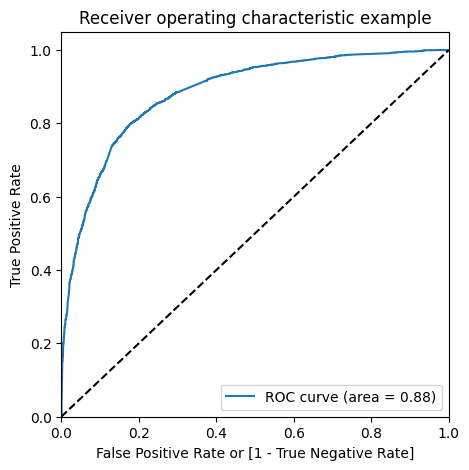

In [101]:
# To plot ROC Curve and calculate AUC Score for Training Predictions"

draw_roc(yTrainPred['Converted'],yTrainPred['Prob'])

In [102]:
# Generating Binary Predictions Based on Probability Thresholds

p = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in p:
    yTrainPred[i]= yTrainPred["Prob"].apply(lambda x: 1 if x > i else 0)

yTrainPred.head()

Converted      Prob  Prospect ID  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  \
0          0  0.469641         1871    1    1    1    1    1    0    0    0   
1          0  0.075767         6795    1    0    0    0    0    0    0    0   
2          0  0.250266         3516    1    1    1    0    0    0    0    0   
3          0  0.783814         8105    1    1    1    1    1    1    1    1   
4          0  0.213499         3934    1    1    1    0    0    0    0    0   

   0.8  0.9  
0    0    0  
1    0    0  
2    0    0  
3    0    0  
4    0    0

In [103]:
# Calculating Accuracy, Sensitivity and Specificity for various probability cutoffs.

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])


for i in p:
    cm1 = confusion_matrix(yTrainPred['Converted'],yTrainPred[i])
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1

    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.598021  0.972425  0.367316
0.2   0.2  0.734075  0.921736  0.618441
0.3   0.3  0.797310  0.841038  0.770365
0.4   0.4  0.815090  0.773723  0.840580
0.5   0.5  0.808905  0.666667  0.896552
0.6   0.6  0.798856  0.601379  0.920540
0.7   0.7  0.782622  0.517437  0.946027
0.8   0.8  0.757112  0.414031  0.968516
0.9   0.9  0.708874  0.252636  0.990005


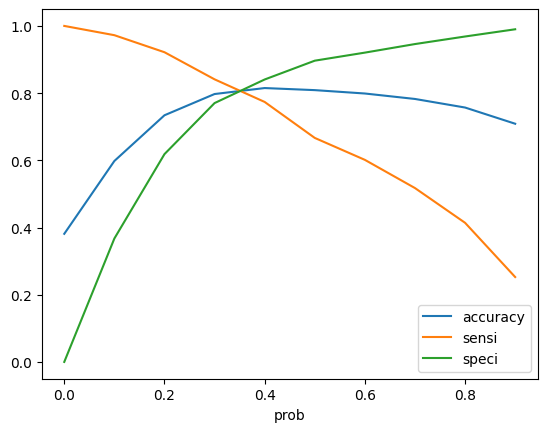

In [104]:
# To plot Accuracy, Sensitivity and Specificity for various probabilities

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [105]:
# To calculate predicted values, choosing probability as 0.35 based on the ROC curve

yTrainPred['Predicted'] = yTrainPred["Prob"].apply(lambda x: 1 if x > 0.35 else 0)
yTrainPred['Lead_Score'] = yTrainPred['Prob'].apply( lambda x: round(x*100))
yTrainPred.head()

Converted      Prob  Prospect ID  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  \
0          0  0.469641         1871    1    1    1    1    1    0    0    0   
1          0  0.075767         6795    1    0    0    0    0    0    0    0   
2          0  0.250266         3516    1    1    1    0    0    0    0    0   
3          0  0.783814         8105    1    1    1    1    1    1    1    1   
4          0  0.213499         3934    1    1    1    0    0    0    0    0   

   0.8  0.9  Predicted  Lead_Score  
0    0    0          1          47  
1    0    0          0           8  
2    0    0          0          25  
3    0    0          1          78  
4    0    0          0          21

In [106]:
# User Defined Function to calculate and print Confusion Matrix and Model Metrics

def get_modelmetrics(df_y):
    conf=confusion_matrix(df_y['Converted'],df_y['Predicted'])
    print(" Confusion Matrix:")
    print(conf,"\n")
    TN=conf[0,0]
    TP=conf[1,1]
    FP=conf[0,1]
    FN=conf[1,0]
    print("True Negatives: ",TN,"\nTrue Positives: ", TP,"\nFalse Positive: ",FP, "\nFalse Negative: ", FN)
    print("\nAccuracy: ",accuracy_score(yTrainPred['Converted'],yTrainPred['Predicted']))
    print("\nSensitivity/Recall: ", TP/(TP+FN))
    print("\nSpecificity: ", TN/(TN+FP))
    print("\nPrecision: ", TP/(TP+FP))
    print("\nF1 Score: ",f1_score(yTrainPred['Converted'],yTrainPred['Predicted']))

In [107]:
print("Training Model Validation metrics\n")
get_modelmetrics(yTrainPred)

Training Model Validation metrics

 Confusion Matrix:
[[3243  759]
 [ 477 1989]] 

True Negatives:  3243 
True Positives:  1989 
False Positive:  759 
False Negative:  477

Accuracy:  0.8089053803339518

Sensitivity/Recall:  0.8065693430656934

Specificity:  0.8103448275862069

Precision:  0.7237991266375546

F1 Score:  0.762945914844649


In [108]:
# To calculate Precision-Recall Curve metrics

p, r, thresholds = precision_recall_curve(yTrainPred['Converted'],yTrainPred['Prob'])

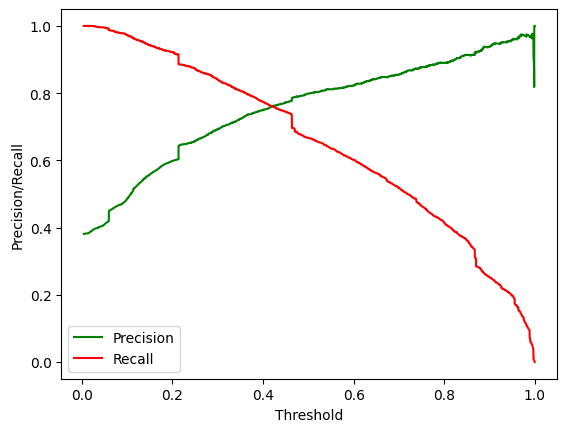

In [109]:
# To plot precision-recall curves across thresholds

plt.plot(thresholds, p[:-1], "g-",label="Precision")
plt.plot(thresholds, r[:-1], "r-", label="Recall")
plt.xlabel('Threshold')
plt.ylabel('Precision/Recall')
plt.legend()
plt.show()

In [110]:
# Choosing probability as 0.41 based on precision-recall curve and evaluating the model
yTrainPred['Predicted'] = yTrainPred["Prob"].apply(lambda x: 1 if x > 0.41 else 0)

print("Training Model Validation metrics\n")
get_modelmetrics(yTrainPred)

Training Model Validation metrics

 Confusion Matrix:
[[3383  619]
 [ 573 1893]] 

True Negatives:  3383 
True Positives:  1893 
False Positive:  619 
False Negative:  573

Accuracy:  0.8157081014223871

Sensitivity/Recall:  0.767639902676399

Specificity:  0.8453273363318341

Precision:  0.7535828025477707

F1 Score:  0.7605464041783848


In [111]:
# As sensitivity dropped with this probability, we will use prob cutoff as 0.35 to get the best results
yTrainPred['Predicted'] = yTrainPred["Prob"].apply(lambda x: 1 if x > 0.35 else 0)

print("Training Model Validation metrics\n")
get_modelmetrics(yTrainPred)

Training Model Validation metrics

 Confusion Matrix:
[[3243  759]
 [ 477 1989]] 

True Negatives:  3243 
True Positives:  1989 
False Positive:  759 
False Negative:  477

Accuracy:  0.8089053803339518

Sensitivity/Recall:  0.8065693430656934

Specificity:  0.8103448275862069

Precision:  0.7237991266375546

F1 Score:  0.762945914844649


# Model Evaluation on Test set

In [112]:
# Scaling the features on Testing data
XTest[numerical_col] = scaler.transform(XTest[numerical_col])

# Creating XTest dataframe with variables selected by RFE
XTest = XTest[Xtrain_rfe.columns]
XTest.head()

Do Not Email  Total_Time  Lead Origin_Landing Page Submission  \
4269             0    0.964504                                    0   
2376             0   -0.885371                                    0   
7766             0   -0.777416                                    0   
9199             0   -0.885371                                    0   
4359             0   -0.885371                                    0   

      Lead Origin_Lead Add Form  Lead Source_Olark Chat  \
4269                          0                       0   
2376                          1                       0   
7766                          0                       0   
9199                          0                       1   
4359                          1                       0   

      Lead Source_Welingak Website  Last Activity_Email Opened  \
4269                             0                           0   
2376                             0                           0   
7766                             0                           0   
9199                             0                           0   
4359                             0                           1   

      Last Activity_Olark Chat Conversation  Last Activity_Others  \
4269                                      0                     0   
2376                                      0                     0   
7766                                      0                     1   
9199                                      1                     0   
4359                                      0                     0   

      Last Activity_SMS Sent  Specialization_Hospitality Management  \
4269                       1                                      0   
2376                       1                                      0   
7766                       0                                      0   
9199                       0                                      0   
4359                       0                                      0   

      Specialization_Others  Curr_Occupation_Working Professional  
4269                      1                                     0  
2376                      1                                     0  
7766                      0                                     1  
9199                      1                                     0  
4359                      0                                     0

In [113]:
# Adding constant variable to Test Data

XTest_sm = smf.add_constant(XTest)

In [114]:
# Predicted values on test set(probability of 1)

ytest_pred = log_model_3.predict(XTest_sm)
ytest_pred = ytest_pred.values.reshape(-1)
yTestdf= pd.DataFrame({'Converted':yTest.values, 'Prob':ytest_pred})
yTestdf['Prospect ID'] = yTest.index
yTestdf.head()
yTestdf['Predicted'] = yTestdf["Prob"].apply(lambda x: 1 if x > 0.35 else 0)
yTestdf['Lead_Score'] = yTestdf['Prob'].apply( lambda x: round(x*100))
yTestdf.head()

Converted      Prob  Prospect ID  Predicted  Lead_Score
0          1  0.690600         4269          1          69
1          1  0.867344         2376          1          87
2          1  0.905155         7766          1          91
3          0  0.059586         9199          0           6
4          1  0.870161         4359          1          87

In [115]:
print("Training Model Validation metrics\n")
get_modelmetrics(yTestdf)

Training Model Validation metrics

 Confusion Matrix:
[[1373  304]
 [ 217  878]] 

True Negatives:  1373 
True Positives:  878 
False Positive:  304 
False Negative:  217

Accuracy:  0.8089053803339518

Sensitivity/Recall:  0.8018264840182648

Specificity:  0.8187239117471675

Precision:  0.7428087986463621

F1 Score:  0.762945914844649


**Observation:**
- Metrics are close to train set metrics, the model is stable.

In [116]:
# Let's sort parameters of final Logistic Regression Model to check for top features

log_model_3.params.sort_values(ascending=False)

Lead Origin_Lead Add Form                3.046808
Curr_Occupation_Working Professional     2.644358
Lead Source_Welingak Website             2.561375
Last Activity_SMS Sent                   1.909112
Last Activity_Others                     1.392287
Total_Time                               1.066049
Lead Source_Olark Chat                   1.022836
Last Activity_Email Opened               0.751451
Last Activity_Olark Chat Conversation   -0.703482
const                                   -0.952024
Specialization_Hospitality Management   -1.065775
Lead Origin_Landing Page Submission     -1.124447
Specialization_Others                   -1.182373
Do Not Email                            -1.216202
dtype: float64

**Observation:**
- Model is Stable as the train set metrics and Test metrics are comparable and close to each other.
- Sensitivity is ~81% when the probability cutoff is chosen as 0.35. Sensitivity indicates converted leads identified by the model correctly of all potential leads. This is inline with teh traget set by CEO
- Accuracy of the model is 80.6%
- Model has 14 features in total.
- Top 3 features :-
1. "**Lead Origin_Lead Add Form**"
2. "**Curr_Occupation_Working Professional**"
3. "**Lead Source_Welingak Website**"



# Recommendations
- Features with positive coefficients have positive connection or impact with lead conversion and can be used for targeted marketing.
- Targeted Marketing / Advertising can be done on Welingak Website.
- Focus on Working Professionals to convert them to hot (potential) leads.
- Incentives can be provided when lead origin is through lead add_form to encourage conversion.
- Analysis is required on features with negative coefficients to identify improvements.